<a href="https://colab.research.google.com/github/ClaudixoPG/ESI_2025_S1/blob/main/notebooks/ttest_expertos_satisfaccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de T-Test: Experto vs No Experto
Este notebook analiza si existen diferencias significativas en la satisfacción de usuarios expertos y no expertos al usar un videojuego.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Configuración visual
sns.set(style="whitegrid")


In [2]:
# Cargar datos desde GitHub
url = "https://raw.githubusercontent.com/ClaudixoPG/ESI_2025_S1/main/datasets/dataset_ttest_expertos_satisfaccion.xlsx"
df = pd.read_excel(url)
df.head()


,user_id,user_type,satisfaction_score
0,user_1,Experto,69.9
1,user_2,No experto,74.6
2,user_3,Experto,73.8
3,user_4,Experto,76.0
4,user_5,Experto,73.8


In [3]:
# Verificar medias por grupo
group_means = df.groupby("user_type")["satisfaction_score"].mean()
print("Media por tipo de usuario:")
print(group_means)


Media por tipo de usuario:
user_type
Experto       76.796552
No experto    71.748387
Name: satisfaction_score, dtype: float64


In [4]:
# Separar grupos
expertos = df[df["user_type"] == "Experto"]["satisfaction_score"]
no_expertos = df[df["user_type"] == "No experto"]["satisfaction_score"]

# Realizar T-Test
t_stat, p_value = ttest_ind(expertos, no_expertos)

print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")


Estadístico t: 2.90
Valor p: 0.0052


<ipython-input-5-a8909e3b7498>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="user_type", y="satisfaction_score", data=df, palette="Set2")


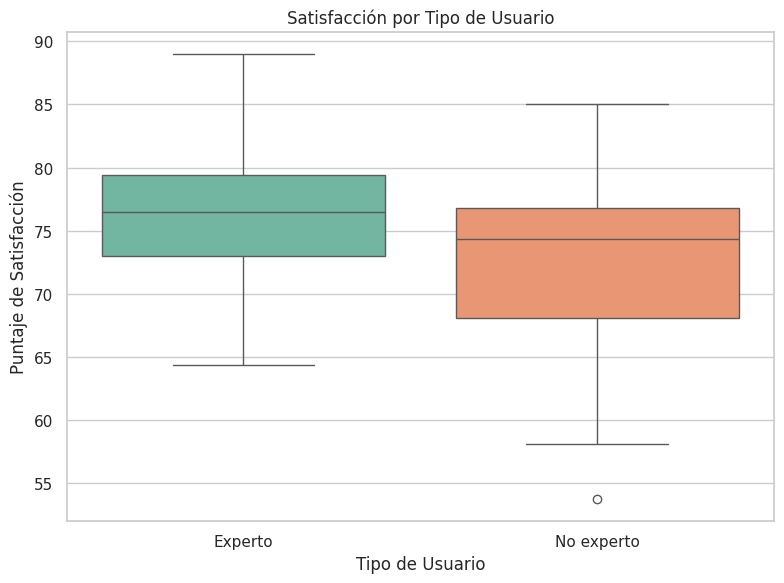

In [5]:
# Boxplot comparativo
plt.figure(figsize=(8, 6))
sns.boxplot(x="user_type", y="satisfaction_score", data=df, palette="Set2")
plt.title("Satisfacción por Tipo de Usuario")
plt.xlabel("Tipo de Usuario")
plt.ylabel("Puntaje de Satisfacción")
plt.tight_layout()
plt.show()


**Interpretación:**
- El T-Test compara si las diferencias entre las medias de ambos grupos son estadísticamente significativas.
- Un valor *p* menor a 0.05 sugiere una diferencia significativa en la satisfacción entre expertos y no expertos.